In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn

C:\Users\ankit\AppData\Local\Temp\ipykernel_25744\2227991648.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [13]:
x = df.drop(columns=['math_score'])
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [14]:
y = df['math_score']

In [15]:
num_feature = x.select_dtypes(exclude = 'object').columns
cat_feature = x.select_dtypes(include = 'object').columns
print(num_feature, cat_feature)

Index(['reading_score', 'writing_score'], dtype='object') Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [17]:
numeric_transform = StandardScaler()
oh_transformer = OneHotEncoder()
transformer = ColumnTransformer([
    ('OneHot', oh_transformer, cat_feature),
    ('Standerd scaler', numeric_transform, num_feature)
    
])
x=transformer.fit_transform(x)


In [18]:
x.shape

(1000, 19)

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [62]:

def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
    

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Decision TreeRegressor": DecisionTreeRegressor(),
}
model_list=[]
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)# train model

    # make prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # evaluiate train and test datset 
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)
    print(list(models.keys())[i])
    
    print('model performance for training set')
    print(' - root mean squared error: {:.4f}'.format(model_train_rmse))
    print(' - Mean absolute error: {:.4f}'.format(model_train_mae))
    print(' - r2 score: {:.4f}'.format(model_train_r2))
    print('---------------------------------------')
    print(' - root mean squared error: {:.4f}'.format(model_test_rmse))
    print(' - Mean absolute error: {:.4f}'.format(model_test_mae))
    print(' - r2 score: {:.4f}'.format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
model performance for training set
 - root mean squared error: 5.3120
 - Mean absolute error: 4.2513
 - r2 score: 0.8794
---------------------------------------
 - root mean squared error: 5.4348
 - Mean absolute error: 4.2853
 - r2 score: 0.8586


Ridge
model performance for training set
 - root mean squared error: 5.3093
 - Mean absolute error: 4.2448
 - r2 score: 0.8796
---------------------------------------
 - root mean squared error: 5.4164
 - Mean absolute error: 4.2825
 - r2 score: 0.8595


Lasso
model performance for training set
 - root mean squared error: 6.6062
 - Mean absolute error: 5.1753
 - r2 score: 0.8135
---------------------------------------
 - root mean squared error: 6.1761
 - Mean absolute error: 5.0135
 - r2 score: 0.8174


RandomForest Regressor
model performance for training set
 - root mean squared error: 2.3520
 - Mean absolute error: 1.8572
 - r2 score: 0.9764
---------------------------------------
 - root mean squared error: 5.8114
 - M

In [3]:
model_list, r2_list, 

NameError: name 'model_list' is not defined

In [65]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model name','R2 score']).sort_values(by =['R2 score'] ,ascending=False)

,model name,R2 score
1,Ridge,0.859539
0,Linear Regression,0.858584
3,RandomForest Regressor,0.838305
4,AdaBoost Regressor,0.818262
2,Lasso,0.817371
5,Decision TreeRegressor,0.710339


In [66]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("accuracy of the model is %.2f "%score)

accuracy of the model is 85.86 


841    64
956    84
544    64
173    63
759    69
       ..
274    88
192    62
398    74
450    64
520    71
Name: math_score, Length: 200, dtype: int64

Text(0, 0.5, 'predicted')

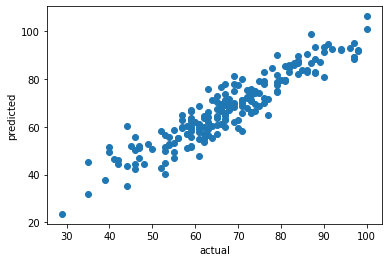

In [77]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual');
plt.ylabel('predicted')


<AxesSubplot:xlabel='math_score'>

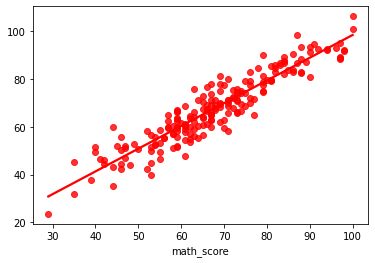

In [70]:
sns.regplot(x=y_test, y=y_pred, ci = None, color = 'red')

In [82]:
# difference btwn Actual and predcited
pred_df = pd.DataFrame({'actual value':y_test, 'predicted value':y_pred, 'difference': y_test-y_pred})
pred_df

,actual value,predicted value,difference
841,64,60.25000,3.75000
956,84,89.46875,-5.46875
544,64,55.50000,8.50000
173,63,61.90625,1.09375
759,69,81.15625,-12.15625
...,...,...,...
274,88,82.50000,5.50000
192,62,59.93750,2.06250
398,74,66.78125,7.21875
450,64,71.37500,-7.37500


In [83]:
pred_df.describe()

,actual value,predicted value,difference
count,200.000000,200.000000,200.000000
mean,67.755000,67.785625,-0.030625
std,14.488428,14.826517,5.448329
min,29.000000,23.500000,-16.125000
25%,59.000000,57.609375,-3.484375
50%,67.000000,66.828125,0.125000
75%,77.000000,78.890625,3.757812
max,100.000000,106.312500,13.406250
